In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd

#imputer to handle missing data 

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

# handle categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


#regression librarry

from sklearn.ensemble import RandomForestRegressor

#o check accuracy

from sklearn.metrics import accuracy_score

# to check accuracy

from sklearn.metrics import *

import pickle 
import os, sys
import csv

# ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Cross Validation

# load dataset
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Dataset has 3 rows and 3 Columns


y_predict value for 6.5 is  [262616.66666667]

 Accuracy train by acc_r2 55.470109523809505


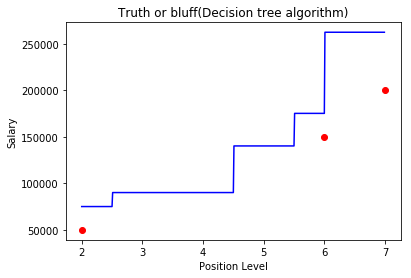

In [3]:
class Cross_validation():
           
    def y_prediction(self,regression, x_train):
        # predicting the test set result
        y_predict = regression.predict(x_train.reshape(-1,1))
        print("y_predict value for 6.5 is ", regression.predict(np.array(6.5).reshape(-1,1)))
        return y_predict
        
    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        acc_r2 = r2_score(y_train, y_predict_train)*100

        return acc_r2
    
    def visualization(self,x_test,y_test, regression):
        
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        
        x_grid = np.arange(min(x_test), max(x_test), 0.01)
        x_grid = x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_test,y_test, color = 'red')
#         
        # reshape x_grid or not both will give same ploting
        plt.plot(x_grid,regression.predict(x_grid.reshape(-1,1)), color = 'blue')
        plt.title("Truth or bluff(Decision tree algorithm)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        

def main():
    #class obj created
    obj  = Cross_validation()
    
    # seperate fetures and label
    x_cv = CV_dataset.iloc[:,1:2].values
    y_cv = CV_dataset.iloc[:,2].values
 
    
    #cross validation
    file1 = open('RandomForestModule.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_cv_pre = obj.y_prediction(reg1, x_cv)
    
    
    acc_r2= obj.accuracy(y_cv_pre,y_cv)
    print("\n Accuracy train by acc_r2", acc_r2)

    obj.visualization(x_cv, y_cv, reg1)

if __name__ == '__main__':
    main()
